# K-means en los pixeles de una imagen

En este ejercicio veremos una aplicación de k-means sobre los pixeles de una imagen. Cada pixel puede verse como un vector en 3 dimensiones, que son los canales rojo, verde y azul (RGB). Entonces, si se aplica k-means, se agruparán los pixeles por su color. Primero vamos a leer la imagen.

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

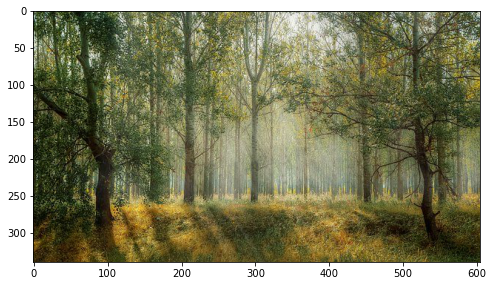

In [5]:
img = Image.open("image.jpg")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.show()

Esta es la imagen que vamos a usar. Vamos a ver a la imagen como una matriz con filas y columnas, donde cada entrada es un vector en 3 dimensiones.


In [6]:
img = np.array(img)
s = img.shape
print("Tamaño de la imagen:", s)
X = img.reshape(s[0] * s[1], s[2])
print("Tamaño de los datos:", X.shape)

Tamaño de la imagen: (340, 604, 3)
Tamaño de los datos: (205360, 3)


Vemos que tenemos una resolución de 340 por 604 y en total son 205360 vectores. Aplicar k-means a estos vectores. Use $k=8$, es decir queremos agrupar todos los pixeles en 8 conjuntos deacuerdo a su color. 

- Guardar los clusters en la variable `X_km`
- Guardar los centroides en la variable `centroids` usando el método `cluster_centers_` de k-means.

In [7]:
# Su código aquí

In [8]:
#| echo: false
K = 8
km = KMeans(K)
X_km = km.fit_predict(X)
centroids = km.cluster_centers_

C:\Users\msubr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Imprimimos los 8 centroides:

In [9]:
#| output: false

print(centroids)

[[ 90.12044226  89.85599509  49.59936118]
 [145.12400553 145.61093047 106.37824282]
 [ 61.33138722  63.23098429  28.74618315]
 [212.89097129 214.48207645 188.93574297]
 [147.84061593 125.97839407  54.48379555]
 [176.00039144 175.08868302 136.03205463]
 [ 30.11515199  31.99886105   8.31042338]
 [112.58991353 115.57009405  78.75392918]]


Estos números no nos dicen nada, será mejor si mostramos el color de los centroides.

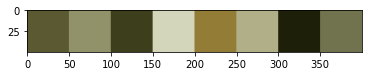

In [10]:
#| output: false

palette = np.zeros((50, 50 * len(centroids), 3))
for i, c in enumerate(centroids):
    color = c[:3].astype("uint8")
    palette[:, i*50: i*50+50, :] += color
plt.imshow(palette.astype("uint8"))
plt.show()

Podemos ver que los centroides nos dicen los colores más usados en la imagen. Recordemos que los centroides son el promedio de los pixeles en cada partición. Podemos ver a los centroides como una paleta de colores básica para la imagen. Podemos convertir los pixeles a su centroide más cercano.

In [11]:
Y = X_km.reshape(s[0],s[1])
img_km = centroids[Y]

Y mostramos como quedó la imagen usando sólo los colores dados por los centroides.

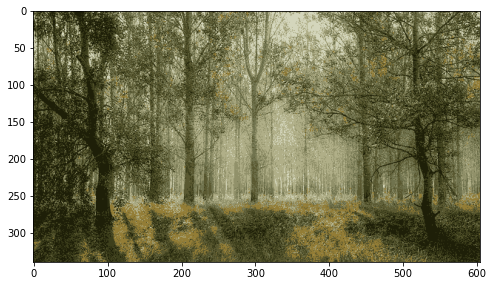

In [13]:
#| output: false

plt.figure(figsize=(8, 8))
plt.imshow((img_km.astype("uint8")))
plt.show()